In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [2]:
num_classes = 10   # Số lượng lớp

In [3]:
# Đọc dữ liệu
train_df = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

In [4]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [5]:
# Thiết lập chuẩn hóa dữ liệu về đoạn [0,1]
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [6]:
# Rút trích dữ liệu cho 80% huấn luyện và 20% là test
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

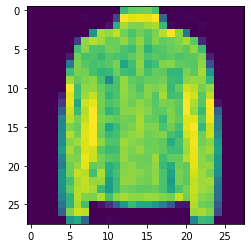

In [7]:
# Thay đổi lại kích thước dữ liệu
image = x_train[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [8]:
# Thiết lập các thông số
image_rows = 28

image_cols = 28

batch_size = 512

image_shape = (image_rows,image_cols,1) # Định nghĩa kích thước ảnh và 1 là cho ảnh 3D


In [9]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [11]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Show mô hình mạng
model.summary()

# Biên soạn mô hình
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)       

In [4]:
history = model.fit(
    x_train,
    y_train,
    batch_size= 128,
    epochs = 40,
    verbose = 1,
    validation_data=(x_validate,y_validate),
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 363s 8ms/step - loss: 0.5384 - accuracy: 0.8142 - val_loss: 1.0141 - val_accuracy: 0.6718
Epoch 2/40
48000/48000 [==============================] - 356s 7ms/step - loss: 0.3322 - accuracy: 0.8834 - val_loss: 0.2710 - val_accuracy: 0.9027
Epoch 3/40
48000/48000 [==============================] - 354s 7ms/step - loss: 0.2750 - accuracy: 0.9026 - val_loss: 0.2570 - val_accuracy: 0.9072
Epoch 4/40
48000/48000 [==============================] - 354s 7ms/step - loss: 0.2441 - accuracy: 0.9129 - val_loss: 0.2001 - val_accuracy: 0.9225
Epoch 5/40
48000/48000 [==============================] - 354s 7ms/step - loss: 0.2204 - accuracy: 0.9221 - val_loss: 0.1959 - val_accuracy: 0.9285
Epoch 6/40
48000/48000 [==============================] - 11794s 246ms/step - loss: 0.1989 - accuracy: 0.9293 - val_loss: 0.2213 - val_accuracy: 0.9168
Epoch 7/40
48000/48000 [==============================] - 

In [6]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2634
Test Accuracy : 0.9405
